<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">🖋️ Stop Prompting & Start Programming: DSPy Signatures 📝</div>

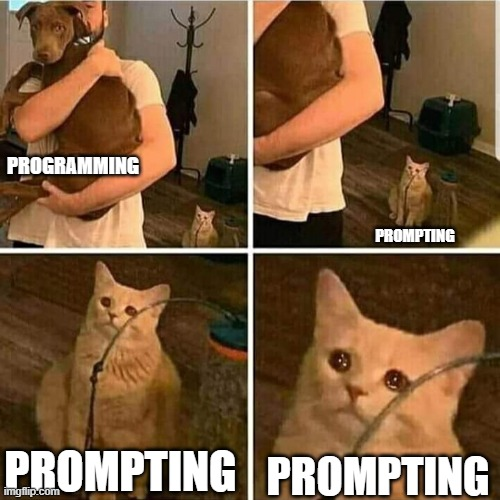

DSPy framework addresses the fragility issues in LLM-based applications through the transition from prompting to programming and compilation.

### What is DSPy

DSPy is a framework created by researchers at Stanford NLP, designed for building applications using large language models (LLMs) through programming rather than prompting. Unlike traditional approaches such as LangChain or LlamaIndex, which depend on crafting prompts manually, DSPy utilizes a programming-based model to develop its pipelines.

This programming-centric approach allows users to modify and adapt their pipelines more effectively when there are changes in components, such as the LLM used or the query type. Essentially, DSPy simplifies the integration and utilization of language models by shifting from labor-intensive prompt engineering to a more structured and automated optimization process.

DSPy stands out by enabling more structured and efficient interactions with LLMs compared to traditional methods that involve manually crafting prompts. This innovative approach offers significant advantages over other frameworks like LangChain and LlamaIndex.

In [1]:
!pip install dspy-ai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 19.1 MB/s eta 0:00:00


In [2]:
import dspy
from pprint import pprint

In [4]:
# HotpotQA is a question answering dataset featuring natural, multi-hop questions, 
# with strong supervision for supporting facts to enable more explainable question answering systems. 
# It is collected by a team of NLP researchers at Carnegie Mellon University, Stanford University, and Université de Montréal.
from dspy.datasets import HotPotQA

# Load the dataset.
dataset = HotPotQA(
    train_seed=1,
    train_size=200,
    eval_seed=2023,
    dev_size=200,
    test_size=0,
    keep_details=True,
)

# Tell DSPy that the 'question' field is the input. Any other fields are labels and/or metadata.
trainset = [x.without("id", "type").with_inputs("question") for x in dataset.train]
devset = [x.without("id", "type").with_inputs("question") for x in dataset.dev]
valset, devset = devset[:50], devset[50:]

In [19]:
from kaggle_secrets import UserSecretsClient
import os

user_secrets = UserSecretsClient()
OPENAI_API_KEY = user_secrets.get_secret("OPENAI_API_KEY")

if OPENAI_API_KEY is None or not OPENAI_API_KEY.strip():
    print("Failed to load OpenAI API key or the key is invalid.")
else:
    # Set the API key in the environment variables
    os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
    print("OpenAI API key loaded successfully.")

BackendError: Unexpected response from the service. Response: {'errors': ['No user secrets exist for kernel id 65016458 and label OPENAI_API_KEY.'], 'error': {'code': 5, 'details': []}, 'wasSuccessful': False}.

In [8]:
gpt3_turbo = dspy.OpenAI(model='gpt-3.5-turbo-1106', max_tokens=300)
dspy.configure(lm=gpt3_turbo)


## What are Signatures in DSPy

Signatures in the context of DSPy are formalized, declarative structures that define the inputs and outputs for tasks executed by a language model (LLM). They serve as the blueprint for how information is processed and responded to within a DSPy pipeline, ensuring that the interactions between the user and the LLM are structured and predictable.    


### How Do They Work

Signatures work by clearly specifying the input fields and the expected output fields. When a signature is defined, such as "question → answer", it informs the DSPy system that when provided with a "question", the LLM is expected to produce an "answer". This syntax helps in automatically configuring the LLM pipeline to handle the specified types of inputs and generate the corresponding outputs without requiring detailed manual prompt crafting. This setup reduces complexity and increases efficiency in utilizing LLMs for various tasks.    

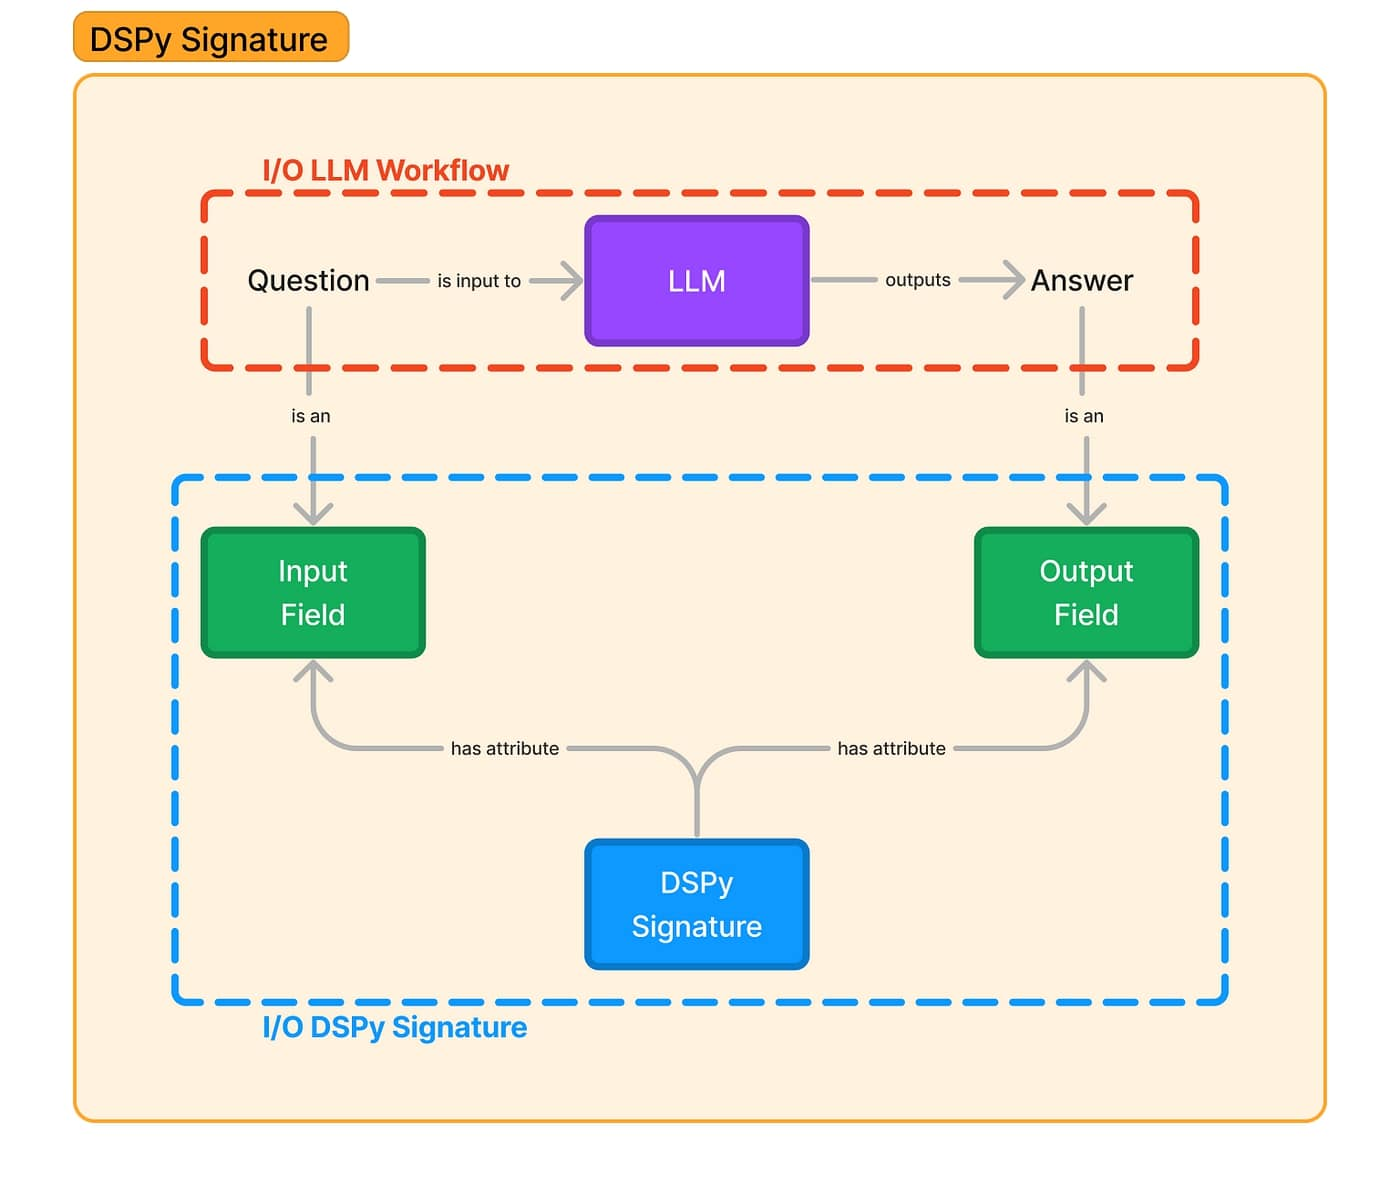

### The Role of Signatures

Using signatures simplifies working with large language models (LLMs) by removing the need to design complex prompts. This makes it easier for users to focus on what they need to do without worrying about how to set up the prompts. Signatures offer a modular and scalable way to use LLMs, meaning they can be easily reused or changed with little effort. This approach helps make the outputs more consistent, enhances ease of use, especially for beginners, and leads to more reliable results from the LLM.

In [9]:
# Here, BasicQA is a signature class defining a simple question-answering task. 
# It includes one input (question) and one output (answer).
class BasicQA(dspy.Signature):
    """Answer questions with short factoid answers."""
    question = dspy.InputField()
    answer = dspy.OutputField(desc="often between 1 and 5 words")

In [10]:
# A Predict object is instantiated using the defined signature.
#This object is ready to process inputs according to the signature.
predictor = dspy.Predict(BasicQA)

In [11]:
# The predictor is used to process an input. Here, question=devset[0].question represents the question from a dataset. 
# The predictor internally constructs a prompt, sends it to the configured language model (LM), 
# and retrieves the model's output.
pred = predictor(question=devset[0].question)

print(f"Question: {devset[0].question}")
print(f"Predicted Answer: {pred.answer}")
print(f"Actual Answer: {devset[0].answer}")

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [ ]:
pred = predictor(question=devset[1].question)

# Print the input and the prediction.
print(f"Question: {devset[1].question}")
print(f"Predicted Answer: {pred.answer}")
print(f"Actual Answer: {devset[1].answer}")

### Inspecting the Prompt
DSPy often provides methods to inspect what was sent to the LM. Using something like turbo.inspect_history(n=1) can show the last n prompts executed by the LM.

In [ ]:
gpt3_turbo.inspect_history(n=1)

# Inline Method

The Inline Method offers a streamlined and intuitive way to define tasks by directly mapping inputs to outputs using a simple syntax. This method is highly effective for straightforward tasks where the relationship between inputs and outputs is direct and uncomplicated.

Signatures are expressed in a straightforward, almost equation-like format that clearly separates inputs from outputs using an arrow (→). Here are a few examples:

- For a question answering task: question → answer
- For sentiment analysis: sentence → sentiment
- For summarization: document → summary

Each signature consists of the input type on the left of the arrow and the output type on the right, defining a clear and concise mapping from what is given to what is expected. This format makes it easy to understand and implement, even for those with minimal technical expertise in LLMs.

Furthermore, signatures can handle complex scenarios involving multiple inputs and outputs. Examples include:

- Retrieval-Augmented Question Answering: context, question -> answer
- Multiple-Choice Question Answering with Reasoning: question, choices -> reasoning, selection

When defining fields in a signature, it's crucial to use semantically meaningful names. However, it's recommended to keep things simple at the beginning to avoid premature optimization. For summarization tasks, terms like document -> summary, text -> gist, or long_context -> tldr are sufficiently clear and intuitive. The DSPy compiler is equipped to refine these terms for optimal interaction with the LLM.

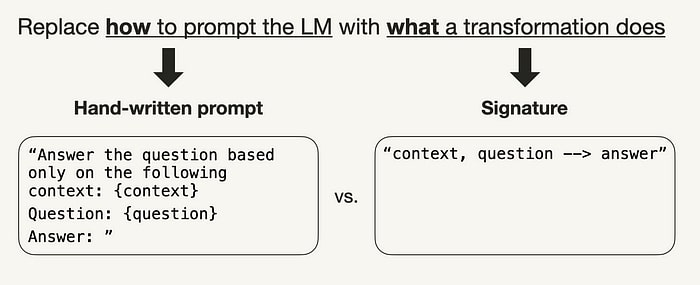

### Example: Summarization

Let's illustrate how the concepts of "text -> gist" and "long_context -> tldr" can be implemented using DSPy signatures for different summarization tasks:

- Gist: When referring to converting "text -> gist," it implies summarizing the main or essential parts of a text. The "gist" of a document, article, or conversation captures the core idea or primary themes without going into detail. It's about understanding the fundamental points that are crucial for grasping the overall message or intent of the text.

- TLDR: The acronym "TLDR" stands for "too long; didn't read." It is commonly used on the internet to signify a short summary that provides the key points of a long piece of writing. When you see "long_context -> tldr," it means summarizing a detailed or lengthy document into a few concise sentences. This summary is intended to give a quick overview, allowing someone to understand the essential information without reading the entire content.

In [ ]:
# Example 1: Text to Gist
# Task: Summarize a detailed article on climate change into its essential insights.

document = """The 2021 United Nations Climate Change Conference, also known as COP26, was held in Glasgow, 
Scotland, and brought together leaders from around the world to commit to new environmental targets. 
The conference focused on major issues such as global temperature rise, deforestation, and carbon neutrality. 
Discussions also included how nations can adapt to climate impacts and finance the transition to cleaner energy sources. 
While some agreements were made, critics argue that the steps taken are not enough to prevent the most severe effects of climate change."""

summarize = dspy.ChainOfThought('text -> gist')
response = summarize(text=document)

pprint(response.gist)

In [ ]:
# Long Context to TLDR
# Task: Provide a brief overview of a lengthy report on the latest advancements in artificial intelligence.

long_context = """Recent advancements in artificial intelligence (AI) have been substantial, 
with significant progress in areas such as machine learning algorithms, natural language processing, and robotic automation. 
These developments have led to practical applications that are transforming industries including healthcare, automotive, 
and financial services. For example, AI is now being used to develop more accurate diagnostic tools, autonomous vehicles, 
and personalized banking services. Furthermore, AI technologies are being integrated into everyday devices to enhance user 
experiences through more sophisticated voice and image recognition capabilities."""

summarize = dspy.ChainOfThought('long_context -> tldr')
response = summarize(long_context=long_context)

pprint(response.tldr)

# Class-Based Method

The Class-Based Method provides a more detailed and structured approach to defining task signatures. It is suitable for complex tasks that require additional context, descriptions, or specific formatting. Here are some highlights of the Class-Based Method:

- Structured Definitions: Each signature is defined as a class, where input and output fields can have detailed attributes such as descriptions, prefixes, and specific formatting rules. This allows for more granular control over how inputs and outputs are handled.
- Example: Consider a signature class for an emotion classification task:

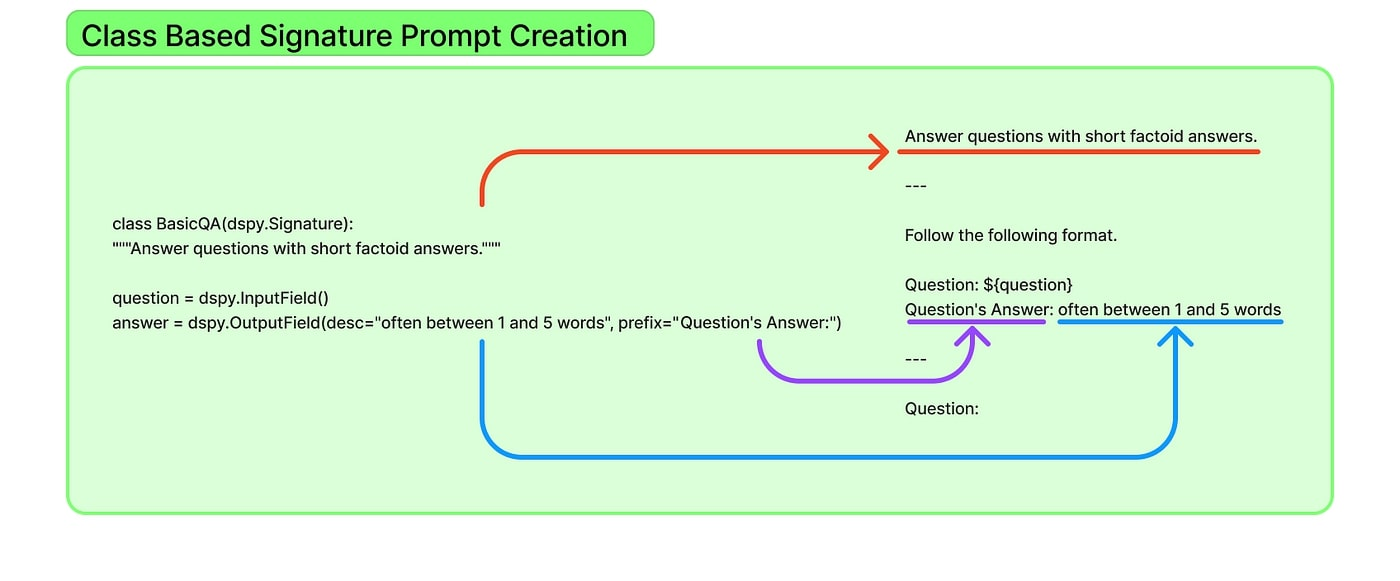

In [ ]:
class Emotion(dspy.Signature):
    """Classify emotion among sadness, joy, love, anger, fear, surprise."""
    
    sentence = dspy.InputField()
    sentiment = dspy.OutputField(desc="often between 1 and 5 words", prefix="Question's Answer:")

# In this example, the sentence serves as the input, and sentiment is the output, 
# with additional details provided to guide the model's response.¨

# prefix is a label or placeholder text that is used before the actual content in the input or output fields. 
# It serves as a way to provide additional context or a prompt to the user or the system processing the data.

predictor = dspy.Predict(Emotion)

# Example text input
text_input = "I started feeling a little stressed when the giant spotlight started blinding me"

# Using the predictor to classify emotion
emotion_response = predictor(sentence=text_input)

print("Emotion Detected:", emotion_response.sentiment)

### Breakdown of I/O Field Components

- **Description (desc)**: This attribute provides a brief explanation of what the field is used for. It helps developers and users understand the purpose of the data being entered or the data expected as output. It enhances readability and usability in complex systems where multiple inputs or outputs might be involved.

- **Prefix (prefix)**: As mentioned earlier, the prefix acts as a label or introductory text that precedes the actual data in the prompt. In the context of generating responses, this is particularly useful for formatting outputs in a predictable manner, which can be essential for data parsing or user interaction. The prefix effectively sets the stage for the response, indicating how the information should be presented.

- **Format (format)**: This attribute specifies how the input or output should be formatted, particularly when dealing with non-string data. If an input field accepts a list, for example, the format method can define how this list should be processed or displayed, ensuring the data is handled correctly by the language model.

In [ ]:
class Field:
    def __init__(self, *, prefix=None, desc=None, input=False, format=None):
        self.prefix = prefix
        self.desc = desc
        self.is_input = input
        self.format = format

class InputField(Field):
    def __init__(self, *, prefix=None, desc=None, format=None):
        super().__init__(prefix=prefix, desc=desc, input=True, format=format)

class OutputField(Field):
    def __init__(self, *, prefix=None, desc=None, format=None):
        super().__init__(prefix=prefix, desc=desc, input=False, format=format)

# The super() function in Python is a built-in function that returns a temporary object of the superclass, 
# allowing you to call methods of the superclass in your subclass. 
# The purpose of super() is to provide a means to access methods from a class's parent (or superclass) 
# without having to explicitly name the parent class. 
# This is particularly useful in inheritance structures where the exact class of the parent may not be known 
# or may change as the class hierarchy evolves.

# Example usage
input_field = InputField(desc="Input your data here.", prefix="Enter Data:")
output_field = OutputField(desc="Results will be shown here.", prefix="Result:")

print(input_field.prefix)  # Output: Enter Data:
print(output_field.desc)   # Output: Results will be shown here.

Both InputField and OutputField are classes that inherit from a base class called Field. In object-oriented programming, this means that they will inherit (or receive) all the methods and properties from Field unless they are specifically overridden.

**Constructor Method (__init__)**

The __init__ method is a special method in Python known as the constructor. It's called when a new object (instance) of the class is created. This method initializes the instance using the parameters provided.

**super() Function**

The super() function is used to call the corresponding method from the parent class (Field). This is important because it ensures that the base class is properly initialized with the parameters that are common to all types of fields, along with specific settings that might be unique to each subclass.

### Creating Custom Patterns vs. Using Defined Patterns (Inline Method)

#### Class-Based Signatures:

- **Customization**: They allow for extensive customization of the input and output fields. You can specify descriptions, prefixes, and other formatting options, which can help in setting up complex tasks that require detailed instructions or need to adhere to specific output formats.
- **Flexibility**: This method is flexible in handling various data types and structures. For example, you could modify how inputs are processed (e.g., handling lists instead of strings) or how outputs are formatted.
- **Rich Context**: They can provide a richer context within the signature itself, which can be essential for tasks that depend heavily on precise definitions or need detailed instructions embedded within the model's task.

#### Inline Signatures:

- **Simplicity and Speed**: Inline methods are straightforward and quick to set up. They are ideal for tasks where the relationship between inputs and outputs is direct and does not require additional context or complex processing.
- **Predefined Patterns**: Typically, inline methods are used for more standard tasks that do not require extensive customization. They work well when the task can be clearly described by simply mapping inputs directly to outputs.
- **Ease of Use**: Inline methods are easier to implement and manage, especially for beginners or in scenarios where tasks can be described with minimal complexity.

In summary, if your task requires specific instructions, detailed input/output handling, or needs to incorporate rich contextual information, the class-based method is appropriate. It offers the ability to create bespoke patterns tailored to complex needs. On the other hand, the inline method is more suited for straightforward tasks with well-defined, simple input-output relationships.

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Collection of my notebooks for your enjoyment</div>

Stop Prompting & Start Programming: DSPy
* [Stop Prompting & Start Programming: DSPy Examples](https://www.kaggle.com/code/marcinrutecki/stop-prompting-start-programming-dspy-examples)

AI Search Engines:
* [AI Crew Streamlines Next-Gen Research Process](https://www.kaggle.com/code/marcinrutecki/ai-crew-streamlines-next-gen-research-process)
* [LLM Enhanced Web Search: The Tavily & Lang Chain](https://www.kaggle.com/code/marcinrutecki/llm-enhanced-web-search-the-tavily-lang-chain)

LangChain
* [LangChain: Multiple chains simply Explained](https://www.kaggle.com/code/marcinrutecki/langchain-multiple-chains-simply-explained)

Image Generation
* [Face Image Enhance Upscale With GFPGAN Explained](https://www.kaggle.com/code/marcinrutecki/face-image-enhance-upscale-with-gfpgan-explained)
* [Stable Diffusion XL Hugging Face API Explained](https://www.kaggle.com/code/marcinrutecki/stable-diffusion-xl-hugging-face-api-explained)

ML Principles
* [One Hot Encoding - everything you need to know](https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know)
* [Stacking classifier - ensemble for great results](https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results)
* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)
* [Standardize or Normalize - Ultimate Answer](https://www.kaggle.com/code/marcinrutecki/standardize-or-normalize-ultimate-answer)

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> References</div>

* [HotpotQA Homepage](https://hotpotqa.github.io)
* [DSPy Homepage](https://dspy-docs.vercel.app)
* [DSPy GitHub](https://github.com/stanfordnlp/dspy)
* [LangChain Integrations](https://python.langchain.com/docs/integrations/providers/dspy)

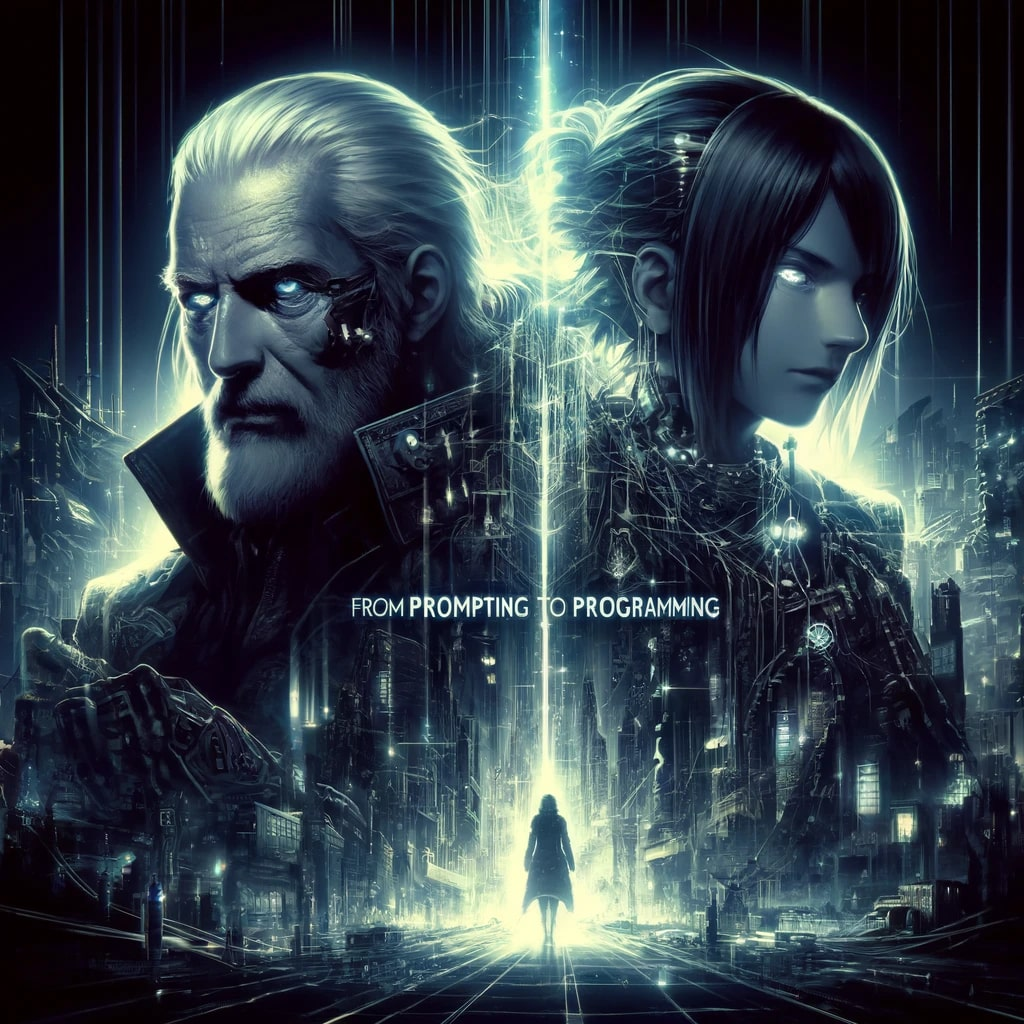